<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Load-libs" data-toc-modified-id="Load-libs-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load libs</a></span></li><li><span><a href="#Visualize-function" data-toc-modified-id="Visualize-function-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualize function</a></span></li></ul></li><li><span><a href="#Exploration-and-problems" data-toc-modified-id="Exploration-and-problems-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploration and problems</a></span><ul class="toc-item"><li><span><a href="#ROI" data-toc-modified-id="ROI-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ROI</a></span></li><li><span><a href="#RGB-to-YUV-test" data-toc-modified-id="RGB-to-YUV-test-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>RGB to YUV test</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Load data</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Partition-data" data-toc-modified-id="Partition-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Partition data</a></span></li><li><span><a href="#Reshape" data-toc-modified-id="Reshape-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Reshape</a></span></li><li><span><a href="#One-hot" data-toc-modified-id="One-hot-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>One hot</a></span></li><li><span><a href="#Keras-CNN" data-toc-modified-id="Keras-CNN-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Keras CNN</a></span><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Predict-and-eval" data-toc-modified-id="Predict-and-eval-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Predict and eval</a></span></li><li><span><a href="#Visualise" data-toc-modified-id="Visualise-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Visualise</a></span></li></ul></li><li><span><a href="#Keras-Dropout" data-toc-modified-id="Keras-Dropout-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Keras Dropout</a></span><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Predict-and-eval" data-toc-modified-id="Predict-and-eval-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Predict and eval</a></span></li><li><span><a href="#Visualize" data-toc-modified-id="Visualize-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Visualize</a></span></li></ul></li></ul></li><li><span><a href="#Small-training-set" data-toc-modified-id="Small-training-set-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Small training set</a></span><ul class="toc-item"><li><span><a href="#Prepare" data-toc-modified-id="Prepare-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Prepare</a></span></li><li><span><a href="#Augmentation" data-toc-modified-id="Augmentation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Augmentation</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Predict-and-eval" data-toc-modified-id="Predict-and-eval-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Predict and eval</a></span></li></ul></li></ul></div>

# Introduction
## Load libs

In [1]:
import cv2
import numpy as np
import pandas as pd
import random
import pickle

import csv
from matplotlib import cm
from matplotlib import pyplot as plt
import seaborn as sns

import random
import sklearn.model_selection
import sklearn.linear_model
from sklearn.metrics import confusion_matrix, accuracy_score

import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras import backend as K
from keras import optimizers
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## Visualize function

In [2]:
def vis_acti(model_in, n):
    # prepare data
    x_act = data.loc[data.iloc[:, 0] == n, 1:]
    x_act = np.array(x_act)
    x_act = x_act.reshape(x_act.shape[0], 32, 32, 1)
    print("Activation data shape:", x_act.shape)
    
    
    layer_outputs = [layer.output for layer in model_in.layers[:4]] # Extracts the outputs of the top 4 layers
    activation_model = models.Model(inputs=model_in.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
    
    activations = activation_model.predict(x_act) 
    
    # large img
    first_layer_activation = activations[0]
    print("First layer activation shape: ",first_layer_activation.shape)
    plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
    
    layer_names = []
    for layer in model_in.layers[:4]:
        layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

    images_per_row = 16

    for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
        n_features = layer_activation.shape[-1] # Number of features in the feature map
        size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
        n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols): # Tiles each filter into a big horizontal grid
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, # Displays the grid
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Exploration and problems
Problems:

* Images are in PPM format.
* Number of images of each class is unbalanced.
* Each image contains a traffic sign.
* Sizes of images are not uniform, not necessarily square.
* Images contain a border.
* Sign might not be centered.

## ROI

In [3]:
def roi_resize(input_img, roi, i):
    """Crop the Region Of Interest and resize
    in: input_img: cv2 image
        roi: pd.DataFrame of roi coordinates
    """
    x1 = roi.iloc[i, ].loc["Roi.X1"]
    x2 = roi.iloc[i, ].loc["Roi.X2"]
    y1 = roi.iloc[i, ].loc["Roi.Y1"]
    y2 = roi.iloc[i, ].loc["Roi.Y2"]
    
    roi_img = input_img[ y1:y2, x1:x2 ]
    
    return(cv2.resize(roi_img, (32, 32)))

In [4]:
annotation = pd.read_csv("./data/GTSRB/Final_Training/Images/00000/GT-00000.csv",
                        sep = ";")

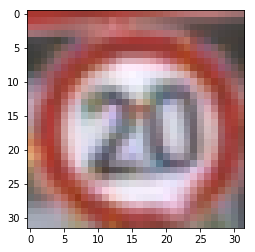

In [5]:
img = cv2.imread("./data/GTSRB/Final_Training/Images/00000/00000_00009.ppm")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_roi = roi_resize(img, annotation, 9)
plt.imshow(img_roi)


## RGB to YUV test

In [6]:
def make_lut_u():
    return np.array([[[i,255-i,0] for i in range(256)]],dtype=np.uint8)

def make_lut_v():
    return np.array([[[0,255-i,i] for i in range(256)]],dtype=np.uint8)


img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
y, u, v = cv2.split(img_yuv)

y = roi_resize(y, annotation, 0)

type(y)
y = np.reshape(y, (32*32))
y.shape
y
# plt.imshow(y)

array([102, 104, 106, ..., 230, 233, 235], dtype=uint8)

##   Load data

In [7]:
def load_labeled_data(training_path, classes):
    
    # empty
    X = np.empty(shape = (0, 32*32))
    y = []
    
    # classes/folders
    for i in classes:
        print(f"Processing class: {i}")
        
        if i < 10:
            annotation_path = f"{training_path}0000{i}/GT-0000{i}.csv"
            path = f"{training_path}0000{i}/"
        else:
            annotation_path = f"{training_path}000{i}/GT-000{i}.csv"
            path = f"{training_path}000{i}/"
            
        annotation = pd.read_csv(annotation_path, sep = ";")    
    
        # files in the folder
        for row in range(0, len(annotation)):
            # find image path using annotation
            image_path = f"{path}{annotation.iloc[row, ].loc['Filename']}"
            # read image and change colors from BGR to YUV
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
            # split color channels
            y_ch, u, v = cv2.split(img)
            
            # crop RoI and resize
            x = roi_resize(y_ch, annotation, row)
            # reshape to (1, 1024)
            x = np.reshape(x, (1, 32*32))
            
            X = np.append(X, x, axis = 0)
            y.append(i)
        
    return(X, y)

This process lasts approx 7 hours on my computer. I will store the results on the hard drive.

In [8]:
# classes = range(0, 5)
# training_path = "./data/GTSRB/Final_Training/Images/"
# x_train, y_train = load_labeled_data(training_path, classes)

Save processed data.

In [9]:
# # x_train
# pickle_out = open("x_train.pickle", "wb")
# pickle.dump(x_train, pickle_out)
# pickle_out.close()

# # y_train
# pickle_out = open("y_train.pickle", "wb")
# pickle.dump(y_train, pickle_out)
# pickle_out.close()

Load data from the hard drive.

In [10]:
# x_train
pickle_in = open("x_train.pickle", "rb")
x_train = pickle.load(pickle_in)
pickle_in.close()

# y_train
pickle_in = open("y_train.pickle", "rb")
y_train = pickle.load(pickle_in)
pickle_in.close()

Lest print a random image to see if it works.

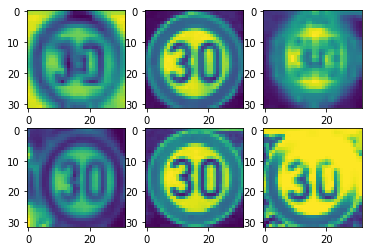

In [11]:
for i in range(6):
    plt.subplot(2, 3, i + 1)
    img = x_train[random.randint(0, 1024)]
    img = np.reshape(img, (32, 32))
    plt.imshow(img)

# Model
## Partition data

In [12]:
x_train.shape

(8070, 1024)

In [13]:
data = np.column_stack((y_train, x_train))
data = pd.DataFrame(data)

In [14]:
random.seed(1234)
train_proc = 0.75
data_train, data_test = sklearn.model_selection.train_test_split(data, test_size = 0.25)

x_train = data_train.iloc[:, 1:]
y_train = data_train.iloc[:, 0]
x_test = data_test.iloc[:, 1:]
y_test = data_test.iloc[:, 0]

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

## Reshape

In [15]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)

## One hot

In [16]:
y_train = keras.utils.to_categorical(y_train, 43)
y_test = keras.utils.to_categorical(y_test, 43)

## Keras CNN
### Load

In [17]:
model = load_model("./models/keras_cnn_1.h5")

### Predict and eval 

In [18]:
model_acc = model.evaluate(x_test, y_test)
print("Accuracy of the Keras model is", round(model_acc[1], 3)* 100, "%")

2018/2018 [==============================] - 2s 894us/step
Accuracy of the Keras model is 98.0 %


###  Visualise

Activation data shape: (2220, 32, 32, 1)
First layer activation shape:  (2220, 28, 28, 32)
Activation data shape: (2250, 32, 32, 1)


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


First layer activation shape:  (2250, 28, 28, 32)


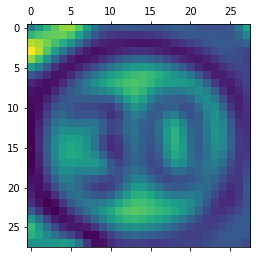

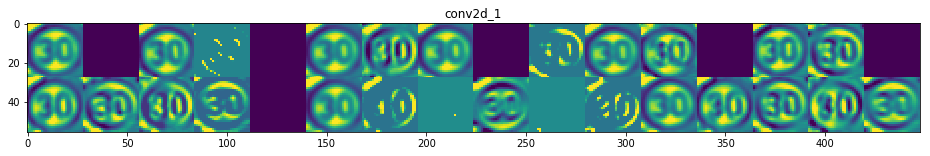

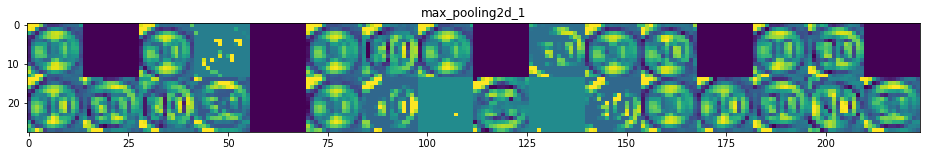

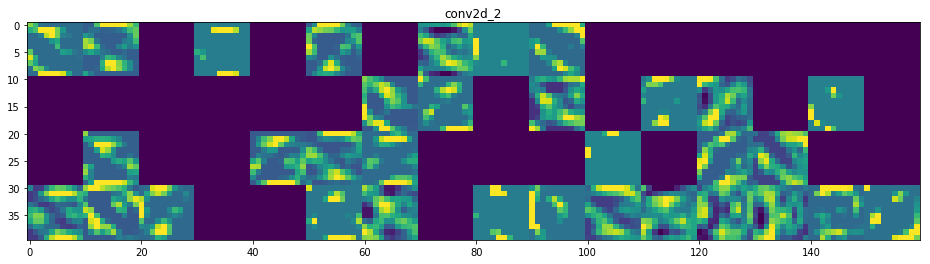

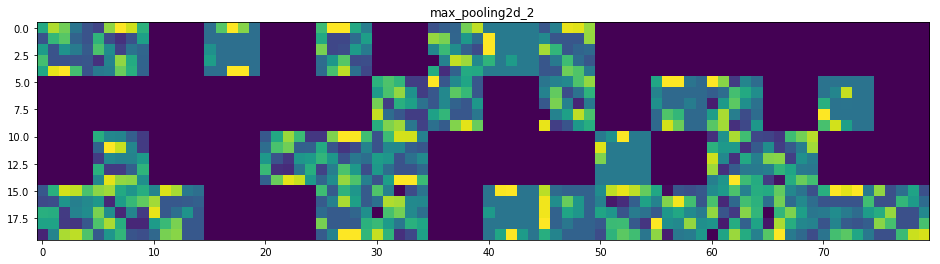

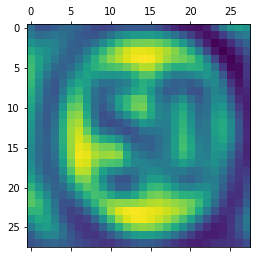

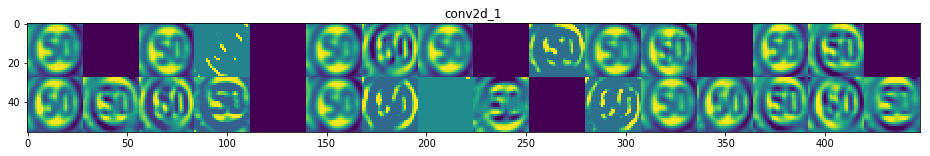

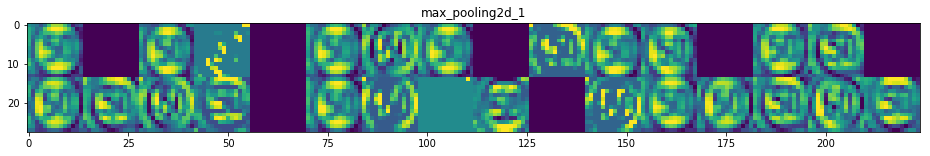

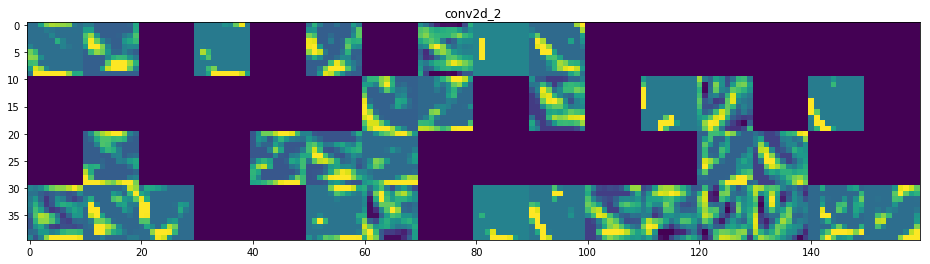

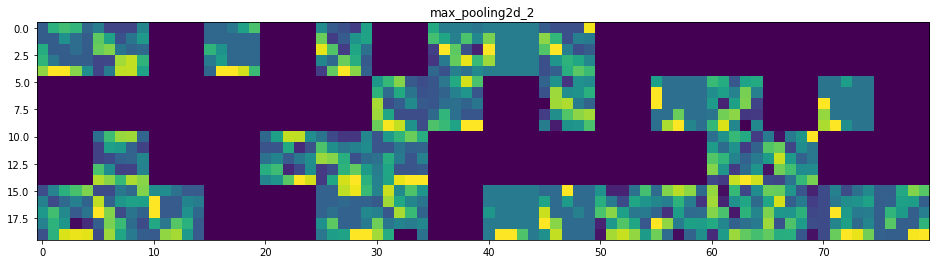

In [19]:
vis_acti(model, 1)
vis_acti(model, 2)

## Keras Dropout 
### Load

In [20]:
model_drop = load_model("./models/keras_cnn_drop.h5")

### Predict and eval

In [21]:
model_acc = model_drop.evaluate(x_test, y_test)
print("Accuracy of the Keras dropout model is", round(model_acc[1], 3)* 100, "%")

2018/2018 [==============================] - 2s 911us/step
Accuracy of the Keras dropout model is 98.2 %


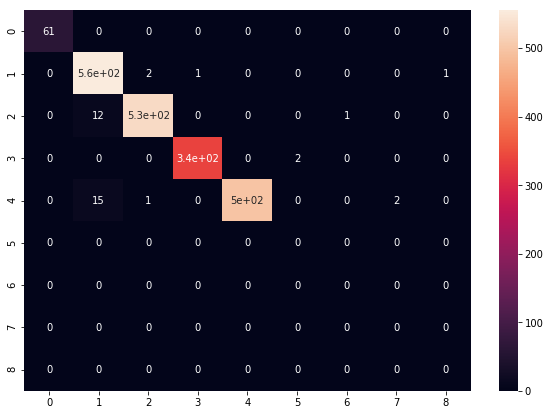

In [22]:
predicted_classes = model_drop.predict_classes(x_test)
y_test_de = np.argmax(y_test, 1)


cm_lr = confusion_matrix(y_test_de, predicted_classes)
plt.figure(figsize = (10, 7))
sns.heatmap(cm_lr, annot=True)

### Visualize

Activation data shape: (2220, 32, 32, 1)
First layer activation shape:  (2220, 28, 28, 32)
Activation data shape: (2250, 32, 32, 1)


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


First layer activation shape:  (2250, 28, 28, 32)


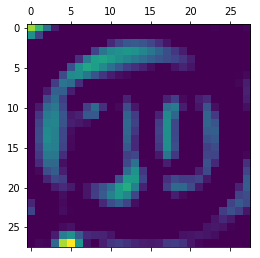

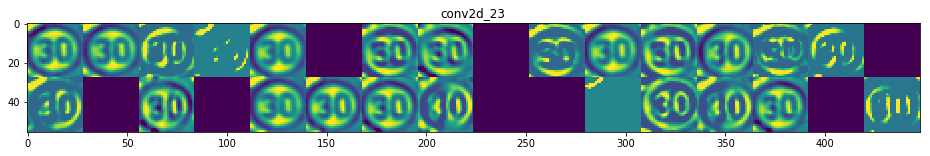

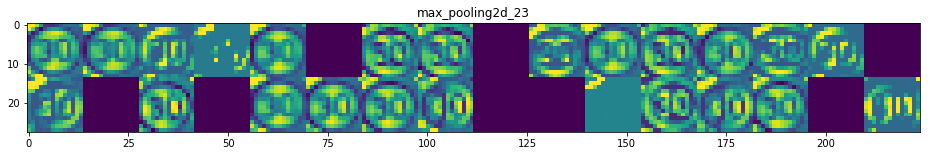

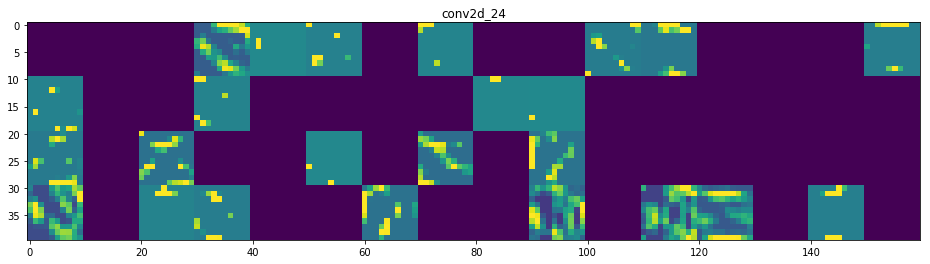

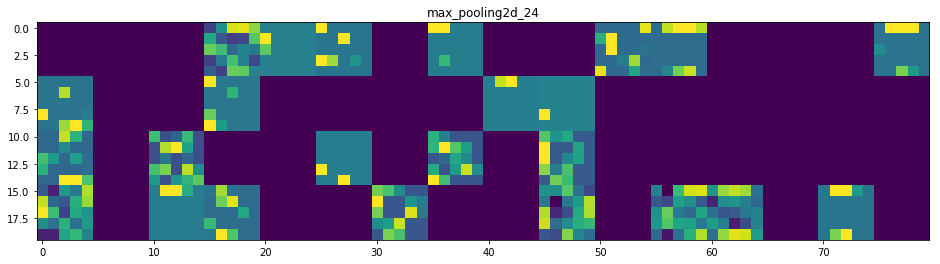

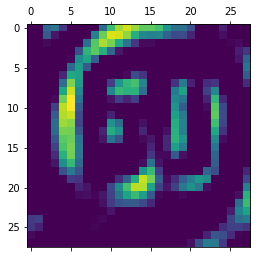

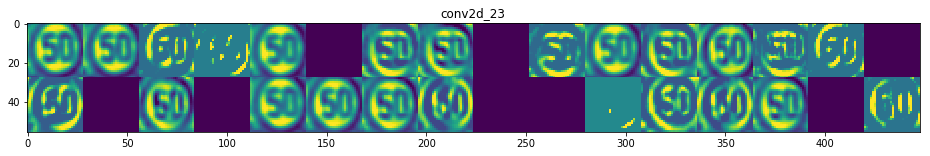

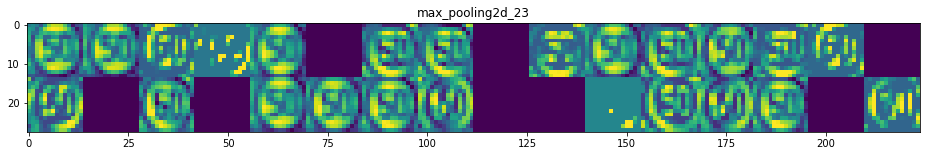

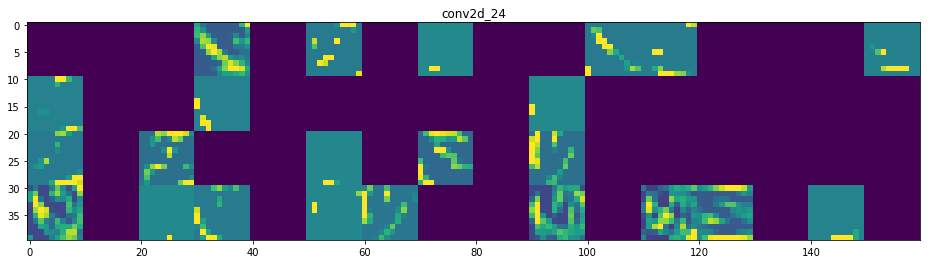

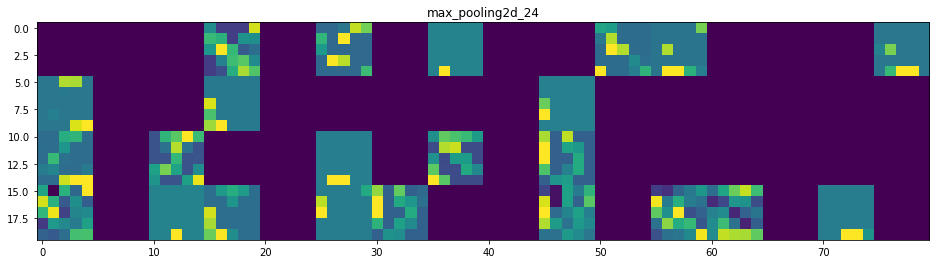

In [23]:
vis_acti(model_drop, 1)
vis_acti(model_drop, 2)

# Small training set
## Prepare
Reload the data.

In [24]:
# x_train
pickle_in = open("x_train.pickle", "rb")
x_train = pickle.load(pickle_in)
pickle_in.close()

# y_train
pickle_in = open("y_train.pickle", "rb")
y_train = pickle.load(pickle_in)
pickle_in.close()

Combine x and y into one DataFrame.

In [25]:
data = np.column_stack((y_train, x_train))
data = pd.DataFrame(data)

Partition, reshape and encode

In [26]:
# partition
random.seed(1234)
train_proc = 0.1
data_train, data_test = sklearn.model_selection.train_test_split(data,
                                                                 test_size = (1-train_proc))

x_train = data_train.iloc[:, 1:]
y_train = data_train.iloc[:, 0]
x_test = data_test.iloc[:, 1:]
y_test = data_test.iloc[:, 0]

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# reshape
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)

# encode
y_train = keras.utils.to_categorical(y_train, 43)
y_test = keras.utils.to_categorical(y_test, 43)

## Augmentation

In [27]:
datagen = ImageDataGenerator(rotation_range = 20,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            horizontal_flip = False)

datagen.fit(x_train)

## Model 

In [28]:
model_small_aug = Sequential()
model_small_aug.add(Conv2D(filters = 32,
                           kernel_size = (5, 5),
                           activation = "relu", input_shape = (32, 32, 1)))
model_small_aug.add(MaxPooling2D(pool_size = (2, 2)))
model_small_aug.add(Conv2D(filters = 64,
                           kernel_size = (5, 5),
                           activation = "relu"))
model_small_aug.add(MaxPooling2D(pool_size = (2, 2)))
model_small_aug.add(Dropout(rate = 0.25))
model_small_aug.add(Flatten())
model_small_aug.add(Dense(units = 1000, activation = "relu"))
model_small_aug.add(Dropout(rate = 0.25))
model_small_aug.add(Dense(units = 43, activation = "softmax"))

model_small_aug.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1601000   
__________

Lets compile it now.

In [29]:
model_small_aug.compile(loss = "categorical_crossentropy",
                       optimizer = optimizers.sgd(
                           lr = 0.005, decay = 1e-6, momentum = 0.9),
                       metrics = ["accuracy"])

And fit.

In [30]:
model_small_aug = load_model("./models/keras_small_aug.h5")

## Predict and eval

In [31]:
model_acc = model_small_aug.evaluate(x_test, y_test)
print("Accuracy of the Keras dropout model is", round(model_acc[1], 3)* 100, "%")

7263/7263 [==============================] - 6s 823us/step
Accuracy of the Keras dropout model is 97.8 %
